Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_38 (Conv2D)                   │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_18 (Flatten)                 │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 128)                 │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 839,047 (3.20 MB)

 Trainable params: 839,047 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.2206 - loss: 1.8692 - val_accuracy: 0.2150 - val_loss: 1.8476
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.2419 - loss: 1.8099 - val_accuracy: 0.2200 - val_loss: 1.8287
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.2756 - loss: 1.7787 - val_accuracy: 0.2350 - val_loss: 1.8341
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.2781 - loss: 1.7632 - val_accuracy: 0.2900 - val_loss: 1.7777
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.3056 - loss: 1.7038 - val_accuracy: 0.2975 - val_loss: 1.7641


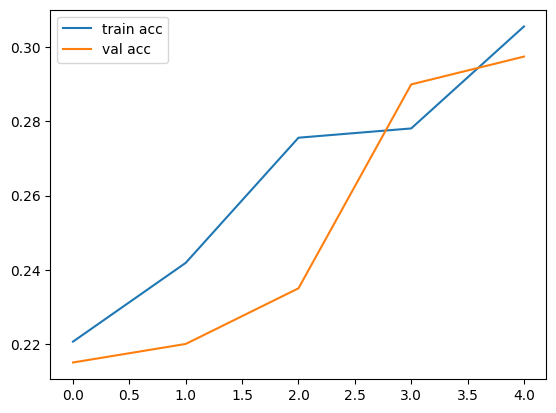

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Predicted Emotion: Happy


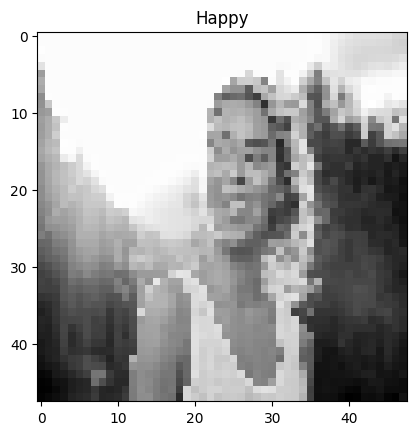

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import cv2

data = pd.read_csv('fer2013.csv')
data = data.sample(2000)  

def pixels_to_array(pixels):
    arr = np.array([int(p) for p in pixels.split()]).reshape(48,48)
    return arr

X = np.array([pixels_to_array(p) for p in data['pixels']])
X = X.reshape(-1,48,48,1) / 255.0  # normalize
y = to_categorical(data['emotion'], num_classes=7)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(7, activation='softmax')  
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=5,
                    validation_data=(X_test, y_test))

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

def predict_emotion(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (48,48))
    img = img.reshape(1,48,48,1) / 255.0
    pred = model.predict(img)
    label = emotion_labels[np.argmax(pred)]
    print("Predicted Emotion:", label)
    plt.imshow(img.reshape(48,48), cmap='gray')
    plt.title(label)
    plt.show()

predict_emotion('laugh.jpg')
